# Backtesting Trading Strategies in Python

---

## 🧠 Introduction:
Welcome! This notebook is designed to help you learn how to backtest trading strategies using Python. You'll learn how to:

- Download financial data
- Build and test a basic trading strategy (Moving Average Crossover)
- Backtest the strategy's performance
- Visualize it using line charts and candlesticks
- Add basic performance metrics (like Sharpe Ratio)
- Organize your project for future expansion

Whether you're a beginner or building toward more advanced quant skills, this walkthrough will help you gain a practical foundation in backtesting.


---

## 📁 Suggested Project Folder Structure

To keep your backtesting projects clean and organized, use the following folder layout:

```
backtesting_project/
│
├── data/                   ← Historical market data (CSV or downloaded)
├── strategies/             ← Your trading strategy functions
│   └── moving_average.py   ← A basic moving average crossover strategy
├── notebooks/              ← Jupyter notebooks like this one
│   └── backtest_demo.ipynb ← This learning notebook
├── utils/                  ← Plotting, performance metrics, helper tools
│   └── plot_tools.py       ← Candlestick and returns plotting
├── main.py                 ← Optional: run backtest from script (non-notebook)
├── requirements.txt        ← Package list
└── README.md               ← Overview of your project (optional)


# 📦 Step 1: Install Required Packages
Uncomment and run the line below if you haven't installed the necessary packages.

In [ ]:
# !pip install yfinance pandas matplotlib numpy mplfinance

# 📥 Step 2: Import Python libraries
These libraries help us fetch financial data, manipulate it, and visualize performance.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf


# 📊 Step 3: Download Historical Financial Data
We use `yfinance` to download stock data. This function fetches OHLC data for a given ticker.
- `ticker`: Stock symbol (e.g., 'AAPL')
- `start`, `end`: Date range for historical data
- The data is cleaned before returning.

In [2]:
def download_data(ticker="AAPL", start="2020-01-01", end="2024-01-01"):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    data.dropna(inplace=True)
    return data

# Example usage:
data = download_data()
data.head()


C:\Users\katie\AppData\Local\Temp\ipykernel_18072\3436027469.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2020-01-02,71.627092,72.681289,71.373218,72.620842
2020-01-03,71.847110,72.676439,71.689950,71.914810
2020-01-06,71.034709,72.526533,70.783248,72.487846
2020-01-07,72.497522,72.753816,71.926907,72.146935
2020-01-08,71.849533,73.609745,71.849533,73.307510


# 💡 Step 4: Create a Simple Moving Average Crossover Strategy
This strategy generates signals when a short-term MA crosses above or below a long-term MA.
- Buy signal when short MA > long MA
- Sell signal when short MA < long MA

In [3]:
def generate_signals(data, short_window=20, long_window=50):
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(
        data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0
    )
    data['Position'] = data['Signal'].diff()
    return data

strategy_data = generate_signals(data)
strategy_data[['Close', 'Short_MA', 'Long_MA', 'Signal', 'Position']].tail()


C:\Users\katie\AppData\Local\Temp\ipykernel_18072\4265024571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(


Price,Close,Short_MA,Long_MA,Signal,Position
Ticker,AAPL,,,,
Date,,,,,
2023-12-22,192.192551,192.260551,183.959355,0,0.0
2023-12-26,191.646576,192.422367,184.245963,0,0.0
2023-12-27,191.745819,192.558868,184.537133,0,0.0
2023-12-28,192.172714,192.767839,184.867973,0,0.0
2023-12-29,191.130325,192.895901,185.203940,0,0.0


# 🔁 Step 5: Backtest the Strategy
We simulate applying our strategy to historical data.
- Calculate daily returns
- Multiply returns by the signal (whether we are in the market or not)
- Calculate cumulative performance for both the strategy and the market (buy & hold).

In [4]:
def backtest_strategy(data):
    data['Daily_Return'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)
    cumulative_strategy = (1 + data['Strategy_Return']).cumprod()
    cumulative_market = (1 + data['Daily_Return']).cumprod()
    return cumulative_strategy, cumulative_market

cumulative_strategy, cumulative_market = backtest_strategy(strategy_data)


# 📈 Step 6: Visualize Strategy vs Market
We plot cumulative returns over time to compare our strategy with a buy-and-hold baseline.

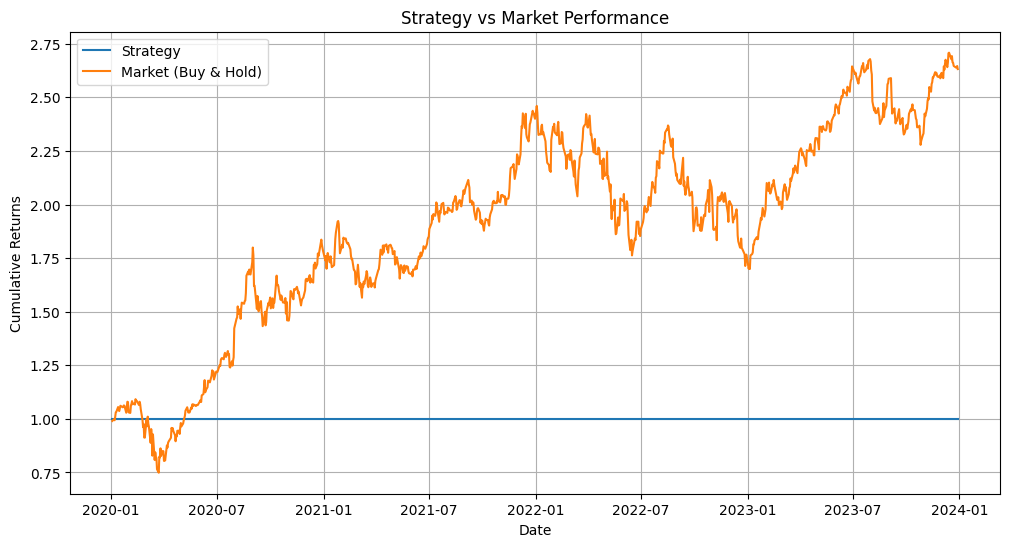

In [5]:
def plot_performance(strategy, market):
    plt.figure(figsize=(12,6))
    plt.plot(strategy, label="Strategy")
    plt.plot(market, label="Market (Buy & Hold)")
    plt.title("Strategy vs Market Performance")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_performance(cumulative_strategy, cumulative_market)


# 📉 Step 7: Visualize Using Candlestick Chart
We use `mplfinance` to display a candlestick chart with moving averages for better technical visibility.

c:\Users\katie\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


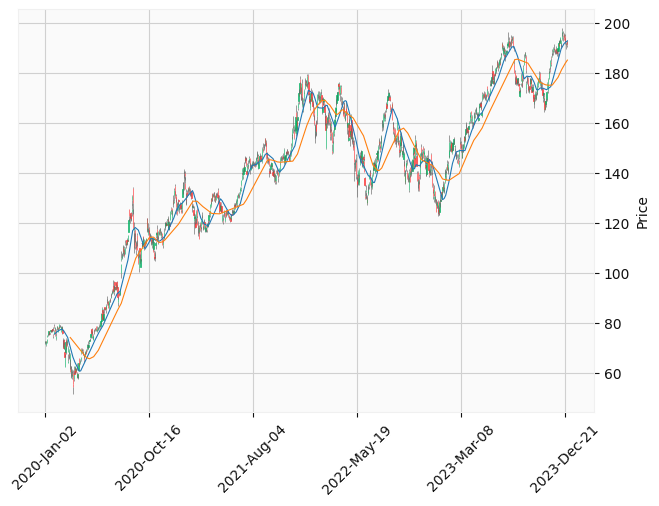

In [8]:
def plot_candlesticks(data):
    # Flatten MultiIndex columns if present
    if isinstance(data.columns, pd.MultiIndex):
        data_flat = data.copy()
        data_flat.columns = [col[0] for col in data.columns]
    else:
        data_flat = data
    # Ensure columns are named as expected by mplfinance
    required_cols = ['Open', 'High', 'Low', 'Close']
    if not all(col in data_flat.columns for col in required_cols):
        raise ValueError(f"Data must have columns: {required_cols}")
    mpf.plot(data_flat, type='candle', mav=(20, 50), volume=False, style='yahoo')

plot_candlesticks(strategy_data)


# 📊 Step 8: Evaluate Strategy Performance with Sharpe Ratio
This metric tells us if our returns are worth the risk. Higher is better.
- Adjusts returns for volatility and compares to a risk-free rate.

In [9]:
def calculate_sharpe_ratio(data, risk_free_rate=0.01):
    excess_return = data['Strategy_Return'] - (risk_free_rate / 252)
    sharpe_ratio = np.sqrt(252) * excess_return.mean() / excess_return.std()
    return sharpe_ratio

sharpe = calculate_sharpe_ratio(strategy_data)
print(f"Sharpe Ratio: {sharpe:.2f}")


Sharpe Ratio: -46458295174094352.00


---

## 🧩 How to Add Your Own Strategies
You can add and test custom trading strategies using two main methods:

### 🔸 Option 1: Inline in the Notebook
Great for fast testing. Create a new function inside the notebook:
```python
def generate_rsi_signals(data):
    # Your RSI logic here
    return data

strategy_data = generate_rsi_signals(data)
```

### 🔸 Option 2: As a Separate Python File (Best Practice)
Create a new file like `strategies/rsi_strategy.py`:
```python
# strategies/rsi_strategy.py

def generate_rsi_signals(data):
    # Your RSI logic here
    return data
```
Then use it in your notebook:
```python
from strategies.rsi_strategy import generate_rsi_signals
strategy_data = generate_rsi_signals(data)
```

➡️ Just make sure your strategy function returns the modified `data` DataFrame with at least these columns:
- `'Signal'`: 1 for long, 0 for flat
- `'Position'`: the difference in signals (used to track trades)


---

## ✅ Next Steps
Now that you've completed a full backtest pipeline, here are options to explore:

🔹 **Try new strategies**:
- RSI-based strategy (momentum)
- Bollinger Bands (volatility-based)
- MACD or Mean Reversion

🔹 **Improve performance analytics**:
- Add drawdown analysis
- Calculate max drawdown, win rate, etc.

🔹 **Refactor and modularize**:
- Move strategies to `strategies/`
- Move plots to `utils/`
- Create reusable scripts

🔹 **Advanced tools**:
- Try `backtrader`, `bt`, or `vectorbt` for advanced simulations

You now have a solid foundation to build and backtest your own algorithmic trading strategies in Python.

Happy coding and trading! 🚀
